### SNA & MDS

In [1]:
import operator
import numpy as np
import seaborn as sns
import pandas as pd
import scipy

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

In [61]:
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.manifold import MDS
from pygsp import graphs

In [4]:
import nltk
from nltk import bigrams
import collections

In [5]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [10]:
# Files definition
comment_freq = 'output\comment_cooc_freq.xlsx'
comment_lift = 'output\comment_cooc_lift.xlsx'
comment_jacc = 'output\comment_cooc_jacc.xlsx'

In [7]:
brands = ['เมจิ', 'ไทยเดนมาร์ค', 'แมคโนเลีย', 'จิตรลดา', 'แดรี่โฮม',
       'โฟร์โมสต์', 'โชคชัย', 'หนองโพ', 'เอ็มมิลค์', 'บีทาเก้น']

เปิดไฟล์ที่ได้จากขั้นตอน Data Prep

In [93]:
cooc_matrix_freq = pd.read_excel(comment_freq,index_col=0)
cooc_matrix_lift = pd.read_excel(comment_lift,index_col=0)
cooc_matrix_jacc= pd.read_excel(comment_jacc,index_col=0)

In [94]:
cooc_matrix_freq.head()

,7-Eleven,tops,ขายไม่ดี,นม,รสหวาน,เมจิ,เบาหวาน,ซื้อ,กาแฟ,จืด,...,แมกนีเซียม,โรคท้องร่วง,สยามพารากอน,ห้างร้าน,โรคขาดอาหาร,ช่องแช่แข็ง,โยเกิร์ท,พารากอน,พาราไดซ์,โด๊บ
7-Eleven,0,3,1,63,5,31,1,51,4,11,...,0,0,0,0,0,0,0,0,0,0
tops,3,0,1,8,1,5,0,6,0,0,...,0,0,0,0,0,0,0,0,0,0
ขายไม่ดี,1,1,0,2,3,3,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
นม,63,8,2,0,64,398,14,367,145,265,...,0,0,1,2,1,1,1,1,1,0
รสหวาน,5,1,3,64,0,22,0,18,7,24,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Transpose into Attribute Rating Format
cooc_matrix_freq = cooc_matrix_freq[brands].T
cooc_matrix_freq.drop(axis=1, columns=brands, inplace=True)

In [96]:
cooc_matrix_freq.head()

,7-Eleven,tops,ขายไม่ดี,นม,รสหวาน,เบาหวาน,ซื้อ,กาแฟ,จืด,ช็อกโกแลต,...,แมกนีเซียม,โรคท้องร่วง,สยามพารากอน,ห้างร้าน,โรคขาดอาหาร,ช่องแช่แข็ง,โยเกิร์ท,พารากอน,พาราไดซ์,โด๊บ
เมจิ,31,5,3,398,22,2,121,55,79,16,...,0,0,1,0,0,1,0,0,0,0
ไทยเดนมาร์ค,6,1,0,204,41,2,44,2,35,13,...,0,0,0,0,0,0,0,1,0,0
แมคโนเลีย,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
จิตรลดา,4,0,0,94,2,0,32,1,11,0,...,0,0,0,0,0,0,0,1,0,0
แดรี่โฮม,2,2,0,33,1,2,19,2,4,2,...,0,0,0,0,0,0,0,1,0,0


In [97]:
cooc_matrix_freq.shape

(10, 328)

In [33]:
#cooc_matrix_freq.describe().stack().unstack(0)

### MDS Visualization

In [ ]:
# https://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

In [98]:
promotions = ['แจก','แชร์','แถม','แพคคู่','โฆษณา','โปรโมชั่น','การลดราคา','ชิม','รีวิว','ลดราคา']
mixtures = ['เวย์','เวย์โปรตีน','แคลเซียม','แคลเซี่ยม','แมกนีเซียม','แลกโตส','แล็กโต๊ส','แลคโตส','แลคติก','โซเดียม','โปรตีน','โพแทสเซียม','โฟเลต','โฟลิค'
                  ,'ไขมัน','ไขมัน 0%','ไขมันต่ำ','กรดไขมัน','กรดอะมิโน','กลูโคส','คาร์โบไฮเดรต','ธาตุเหล็ก','นมข้น','นมผง','นมวัว','น้ำ','น้ำเชื่อม','น้ำตาล','น้ำตาลเทียม'
                  ,'น้ำตาลทราย','น้ำตาลทรายแดง','น้ำนม','น้ำผึ้ง','ปริมาณ','ผสม','วิตามิน','ส่วนผสม','สูตร']
df_mds_promotion = cooc_matrix_freq[promotions]
df_mds_mixtures = cooc_matrix_freq[mixtures]

In [103]:
def create_MDS_perceptual_map(df, attrName):
    embedding = MDS(n_components=2, dissimilarity='euclidean')
    mds_coord = embedding.fit_transform(df)
    fig, ax=plt.subplots(figsize=(10,5))
    ax.set_title(f'MDS Perceptual map: {attrName}', fontsize=20)
    plt.scatter(mds_coord[:,0],mds_coord[:,1])
    labels=df.index
    for label,x,y in zip(labels, mds_coord[:,0], mds_coord[:,1]):
        plt.annotate(label,(x,y), fontsize=13)
    plt.xlabel('PC1', fontsize=16)
    plt.ylabel('PC2', fontsize=16)
    plt.grid(True)
    plt.show()
    return mds_coord.shape, embedding

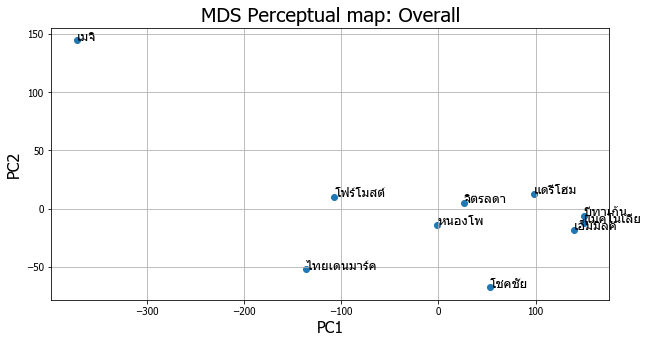

In [105]:
shps, emb = create_MDS_perceptual_map(cooc_matrix_freq,'Overall')

In [107]:
#emb.stress_
#emb.n_iter_
#emb.dissimilarity_matrix_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


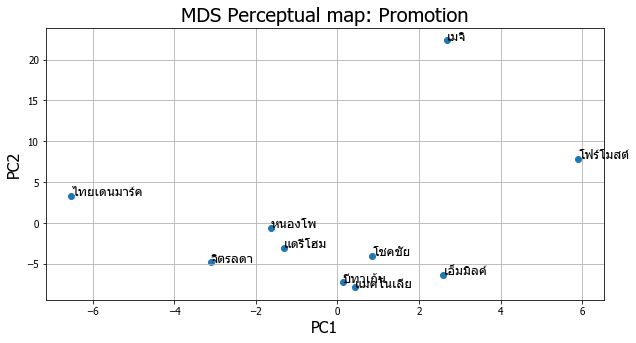

In [108]:
shps, emb = create_MDS_perceptual_map(df_mds_promotion,'Promotion')

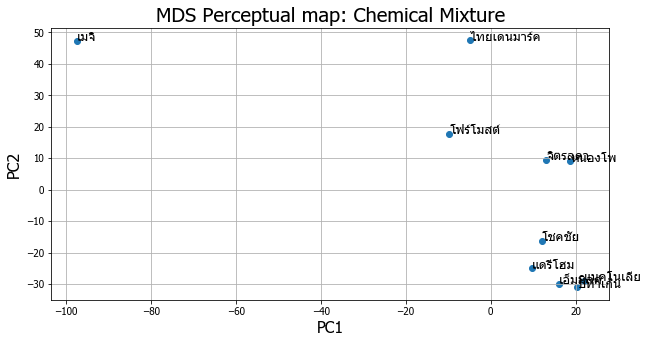

In [109]:
shps, emb = create_MDS_perceptual_map(df_mds_mixtures,'Chemical Mixture')

สร้างกราฟ

In [44]:
def stackForGraph(cm):
    stack_matrix = pd.DataFrame(cm.stack())
    stack_matrix.index.names = ['item', 'relatedItem']
    stack_matrix.columns = ['coocValue']
    stack_matrix.reset_index(inplace=True)
    stack_matrix = stack_matrix[(stack_matrix.item != stack_matrix.relatedItem)]
    stack_matrix.sort_values(by='coocValue',ascending=False).head(10)
    return stack_matrix

In [45]:
def plot_pandas_graph(df):
    fig, ax=plt.subplots(figsize=(15,8))
    G=nx.from_pandas_edgelist(df,source='item',target='relatedItem')
    nx.draw(G,with_labels=True, font_family='Tahoma',node_color='yellow')
    plt.show()
    return G

In [46]:
def create_upperTriMatrix(df):
    df.values[np.tril(np.ones(df.shape)).astype(np.bool)] = 0
    return df

Upper matrix plot (Co-occurence without normalization)

In [50]:
#cooc_matrix_ = create_upperTriMatrix(cooc_matrix)
#cooc_matrix_2 = stackForGraph(cooc_matrix_)

cooc_matrix_2 = stackForGraph(cooc_matrix_jacc)
cooc_matrix_2_filter = cooc_matrix_2[(cooc_matrix_2.coocValue >= 0.01)&(cooc_matrix_2.item.isin(brands))]
#cooc_matrix_2_filter = cooc_matrix_2[(cooc_matrix_2.coocValue >= 0.4)]

In [51]:
cooc_matrix_2

,item,relatedItem,coocValue
1,7-Eleven,tops,0.017964
2,7-Eleven,ขายไม่ดี,0.006494
3,7-Eleven,นม,0.024101
4,7-Eleven,รสหวาน,0.017921
5,7-Eleven,เมจิ,0.035632
...,...,...,...
114238,โด๊บ,โรคขาดอาหาร,0.000000
114239,โด๊บ,ช่องแช่แข็ง,0.000000
114240,โด๊บ,โยเกิร์ท,0.000000
114241,โด๊บ,พารากอน,0.000000


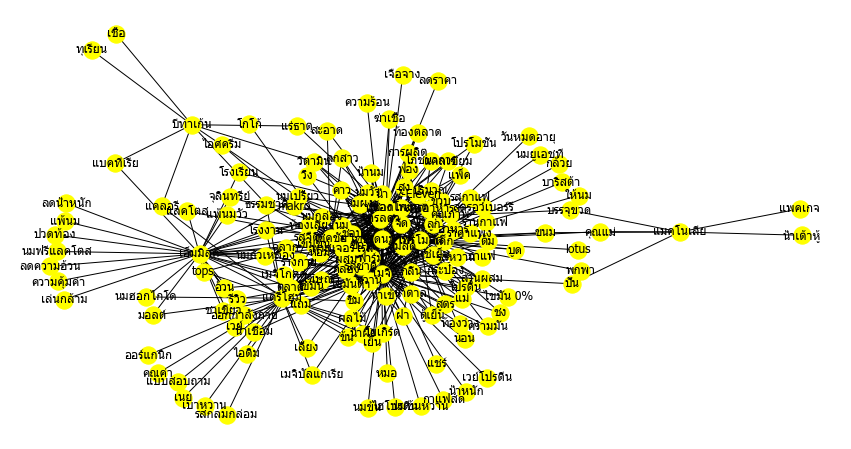

In [52]:
G2 = plot_pandas_graph(cooc_matrix_2_filter)

In [53]:
from community import community_louvain
partition = community_louvain.best_partition(G2)

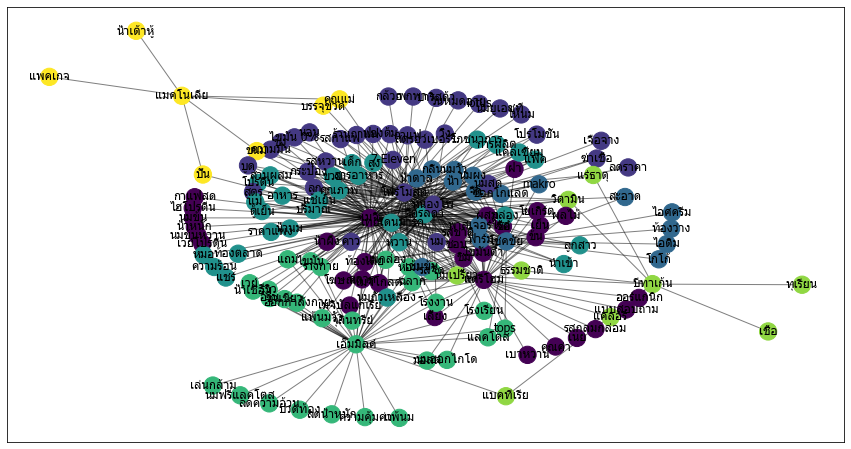

In [54]:
fig, ax=plt.subplots(figsize=(15,8))
G2=nx.from_pandas_edgelist(cooc_matrix_2_filter,source='item',target='relatedItem')
pos = nx.kamada_kawai_layout(G2)
nx.draw_networkx_nodes(G2,pos,partition.keys(),node_color=list(partition.values()))
nx.draw_networkx_edges(G2, pos, alpha=0.5)
nx.draw_networkx_labels(G2,pos,font_family='Tahoma')
plt.show()